**Librerías**

In [745]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## **Revisión de Datos**

In [746]:
path = 'Data/data-even.csv'
data = pd.read_csv(path)

data

,Age,Education,EducationNum,MaritalStatus,Relationship,Gender,CapitalGain,HoursPerWeek
0,39,Bachelors,13,Never-married,Not-in-family,Male,2174,40
1,50,Bachelors,13,Married-civ-spouse,Husband,Male,0,13
2,52,HS-grad,9,Married-civ-spouse,Husband,Male,0,45
3,30,Bachelors,13,Married-civ-spouse,Husband,Male,0,40
4,25,HS-grad,9,Never-married,Own-child,Male,0,35
...,...,...,...,...,...,...,...,...
9860,39,Assoc-acdm,12,Married-civ-spouse,Wife,Female,0,20
9861,65,Prof-school,15,Never-married,Not-in-family,Male,1086,60
9862,43,Some-college,10,Divorced,Other-relative,Female,0,40
9863,43,Some-college,10,Married-civ-spouse,Husband,Male,0,50


In [747]:
data.describe()

,Age,EducationNum,CapitalGain,HoursPerWeek
count,9865.000000,9865.000000,9865.000000,9865.000000
mean,42.686163,10.543031,1511.164420,40.829397
std,14.539611,2.685759,9209.395181,14.543395
min,17.000000,1.000000,0.000000,1.000000
25%,32.000000,9.000000,0.000000,38.000000
50%,42.000000,10.000000,0.000000,40.000000
75%,53.000000,13.000000,0.000000,48.000000
max,90.000000,16.000000,99999.000000,99.000000


In [748]:
print("El cojunto de datos original tiene {} observaciones y {} variables".format(data.shape[0], data.shape[1]))
print("Las columnas son: {}".format(data.columns.tolist()))

El cojunto de datos original tiene 9865 observaciones y 8 variables
Las columnas son: ['Age', 'Education', 'EducationNum', 'MaritalStatus', 'Relationship', 'Gender', 'CapitalGain', 'HoursPerWeek']


### **Variables**

- **Age**: edad en años.
- **Education**: nivel de educación.
- **Education Num**: años de educación (versión númerica de **Education**).
- **MaritalStatus**: estado marital.
- **Relationship**: rol familiar.
- **Gender**: género.
- **CapitalGain**: ganancias desde la capital.
- **HoursPerWeek**: horas trabajadas por semana. 

Vista de las primeras cinco filas.

In [749]:
data.head()

,Age,Education,EducationNum,MaritalStatus,Relationship,Gender,CapitalGain,HoursPerWeek
0,39,Bachelors,13,Never-married,Not-in-family,Male,2174,40
1,50,Bachelors,13,Married-civ-spouse,Husband,Male,0,13
2,52,HS-grad,9,Married-civ-spouse,Husband,Male,0,45
3,30,Bachelors,13,Married-civ-spouse,Husband,Male,0,40
4,25,HS-grad,9,Never-married,Own-child,Male,0,35


- **¿Hay filas innecesarias?**

Verificamos si existen filas duplicadas en el conjunto de datos.

In [750]:
duplicados = data[data.duplicated()]
print(f"Número de filas duplicadas: {len(duplicados)}")
#print(duplicados)

Número de filas duplicadas: 2810


Como existen datos duplicados entonces eliminamos esas filas, excepto la primer ocurrencia que encontremos. 

In [751]:
data = data.drop_duplicates(keep='first')

- **Tipo de dato de las columnas**

In [752]:
print("Tipo de datos por cada columna:\n{}".format(data.dtypes))

Tipo de datos por cada columna:
Age               int64
Education        object
EducationNum      int64
MaritalStatus    object
Relationship     object
Gender           object
CapitalGain       int64
HoursPerWeek      int64
dtype: object


La columna de **'Education'** ya tiene una equivalencia numérica en la columna **'EducationNum'**, por lo tanto sería redundante convertir esa columna categórica a una númerica.

In [753]:
data.drop(data.columns[[1,4]], inplace=True, axis=1)
print("El cojunto de datos ahora tiene {} observaciones y {} columnas".format(data.shape[0], data.shape[1]))
print("Las columnas son: {}".format(data.columns.tolist()))

El cojunto de datos ahora tiene 7055 observaciones y 6 columnas
Las columnas son: ['Age', 'EducationNum', 'MaritalStatus', 'Gender', 'CapitalGain', 'HoursPerWeek']


C:\Users\paola\AppData\Local\Temp\ipykernel_20464\3562100021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data.columns[[1,4]], inplace=True, axis=1)


- **¿Hay valores vacíos en la hoja de datos?**

In [754]:
print("Valores faltantes en cada columna:\n{}".format(data.isnull().sum()))

Valores faltantes en cada columna:
Age              0
EducationNum     0
MaritalStatus    0
Gender           0
CapitalGain      0
HoursPerWeek     0
dtype: int64


Notamos que no hay variables faltantes en el conjunto de datos, lo cual es excelente ya que no necesitamos modificarlo.

- **Tipo de datos por columna**

In [755]:
print("Tipo de datos por cada columna:\n{}".format(data.dtypes))

Tipo de datos por cada columna:
Age               int64
EducationNum      int64
MaritalStatus    object
Gender           object
CapitalGain       int64
HoursPerWeek      int64
dtype: object


Existen:
- 4 variables númericas (todas con valores enteros)
- 3 variables categóricas.

### **Análisis de Variables Categóricas**

In [756]:
print("Valores de cada columna categórica:")
for columna in data.select_dtypes(include=[object]):
    print(columna, ":", data[columna].unique())

Valores de cada columna categórica:
MaritalStatus : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Widowed' ' Married-AF-spouse']
Gender : [' Male' ' Female']


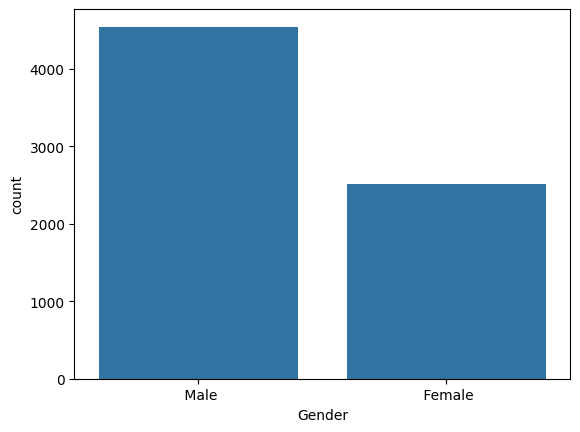

In [757]:
sns.countplot(data=data, x='Gender')
plt.show()

In [758]:
#sns.countplot(data=data, x='Relationship')
#plt.title('Relationship')
#plt.show()

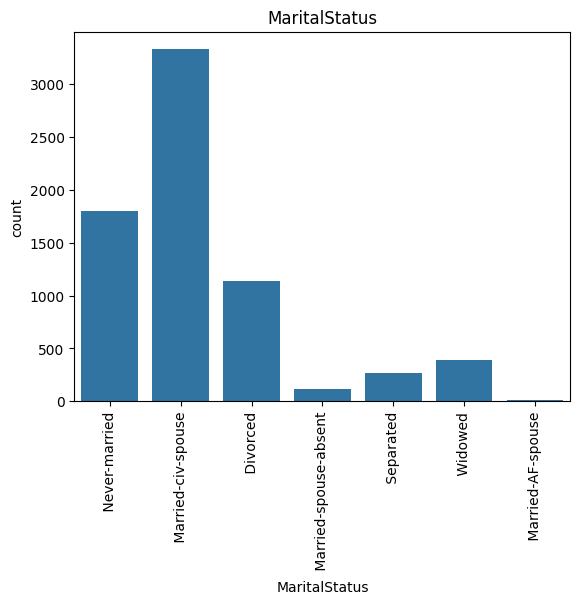

In [759]:
sns.countplot(data = data, x = 'MaritalStatus')
plt.title('MaritalStatus')
plt.xticks(rotation = 90)
plt.show()

Podemos observar que las variables **MaritalStatus** y **Relationship** se relacionan. Uno muestra el estado civil de la persona, ya sea casado, soltero, divorciado, etc. 

Para **MaritalStatus** y **Relationship** notamos que tienen varios estados, pero no hay un orden natural visible entre ellos. Por eso mismo, se decidió utilizar OneHotEncoder.

Sin embargo, **Gender** es fácilmente clasificable entre fememino y masculino.

## **Preprocesamiento**

Convertir variables categóricas a númericas. 

- MaritalStatus
- Relationship
- Gender

In [760]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_cols = ['Age', 'EducationNum', 'HoursPerWeek']
num_col_outlier = ['CapitalGain']
cat_cols = ['MaritalStatus', 'Gender']


num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

log_pipeline = Pipeline([
    ('log', FunctionTransformer(np.log1p, feature_names_out='one-to-one')), 
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop = 'first')),
])

ct = ColumnTransformer(
    [
        ('log', log_pipeline, num_col_outlier),
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

cluster1_data = ct.fit_transform(data)

cluster1_df = pd.DataFrame(
    cluster1_data,
    columns=ct.get_feature_names_out()
)

cluster1_df

,log__CapitalGain,num__Age,num__EducationNum,num__HoursPerWeek,cat__MaritalStatus_ Married-AF-spouse,cat__MaritalStatus_ Married-civ-spouse,cat__MaritalStatus_ Married-spouse-absent,cat__MaritalStatus_ Never-married,cat__MaritalStatus_ Separated,cat__MaritalStatus_ Widowed,cat__Gender_ Male
0,2.108768,-0.315390,0.852018,-0.032797,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.391832,0.417924,0.852018,-1.694790,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.391832,0.551254,-0.537645,0.274979,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.391832,-0.915374,0.852018,-0.032797,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.391832,-1.248698,-0.537645,-0.340574,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7050,-0.391832,0.084600,0.504602,0.459645,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7051,-0.391832,-0.315390,0.504602,-1.263903,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7052,1.883070,1.417898,1.546850,1.198308,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7053,-0.391832,-0.048730,-0.190229,-0.032797,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [761]:
print("Dimensiones:", cluster1_df.shape)
print("Varianza media por columna:", cluster1_df.var().mean())


Dimensiones: (7055, 11)
Varianza media por columna: 0.4341890178441943


In [762]:
cluster1_df.std()

log__CapitalGain                             1.000071
num__Age                                     1.000071
num__EducationNum                            1.000071
num__HoursPerWeek                            1.000071
cat__MaritalStatus_ Married-AF-spouse        0.033657
cat__MaritalStatus_ Married-civ-spouse       0.499259
cat__MaritalStatus_ Married-spouse-absent    0.127178
cat__MaritalStatus_ Never-married            0.436288
cat__MaritalStatus_ Separated                0.191179
cat__MaritalStatus_ Widowed                  0.229642
cat__Gender_ Male                            0.478867
dtype: float64

## **K-Means**

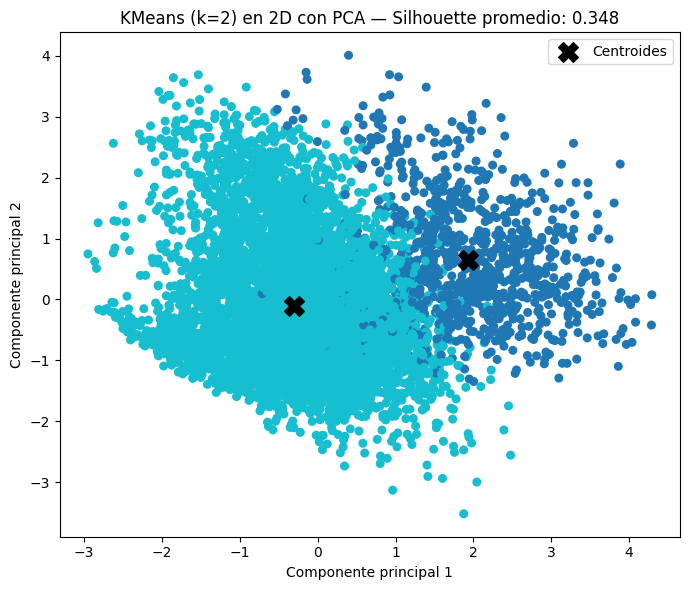

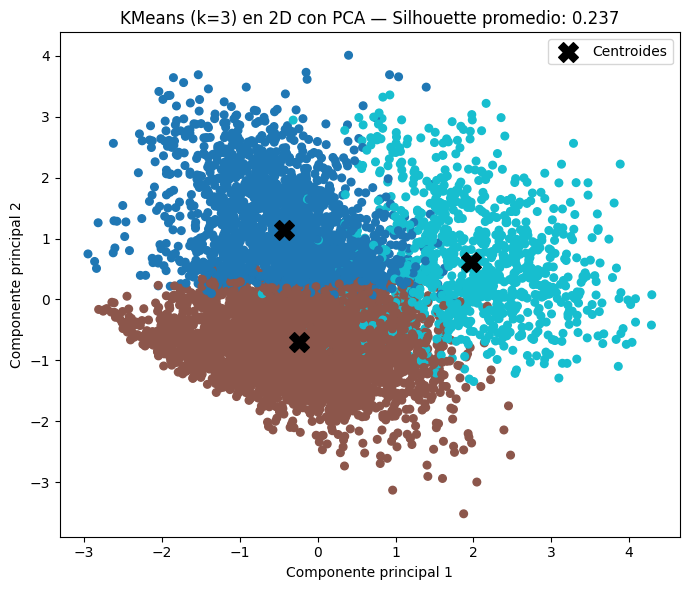

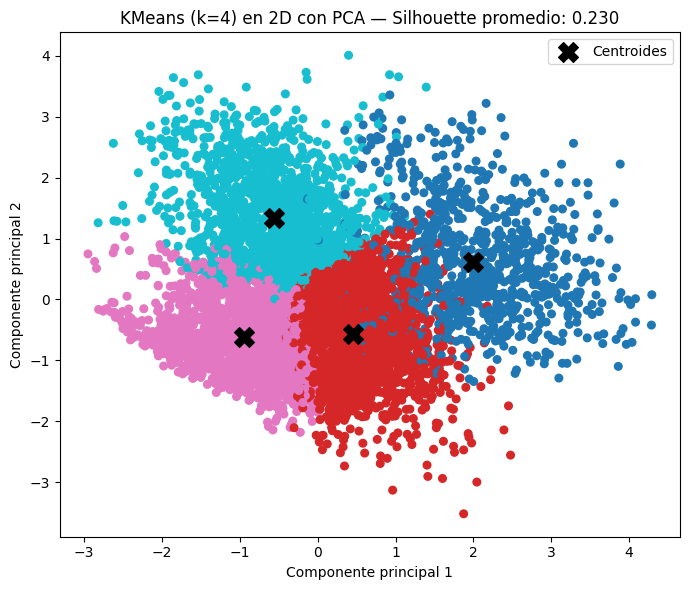

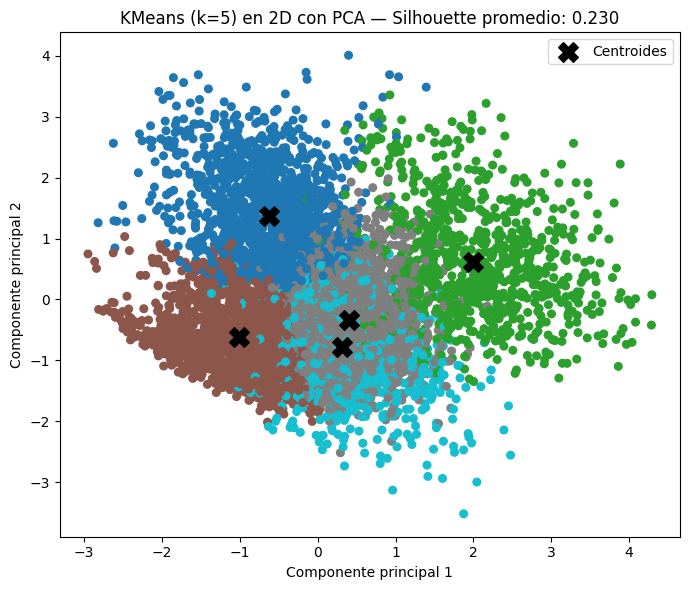

In [780]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

ks = range(2, 6)



for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=12, n_init=40)
    labels = kmeans.fit_predict(cluster1_data)

    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(cluster1_data, labels)
    else:
        silhouette_avg = np.nan

    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(cluster1_data)

    centroids_pca = pca.transform(kmeans.cluster_centers_)

    plt.figure(figsize=(7, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                marker='X', s=200, c='black', label='Centroides')

    # Título con el valor del silhouette
    plt.title(f"KMeans (k={k}) en 2D con PCA — Silhouette promedio: {silhouette_avg:.3f}")
    plt.xlabel("Componente principal 1")
    plt.ylabel("Componente principal 2")
    plt.legend()
    plt.tight_layout()
    plt.show()


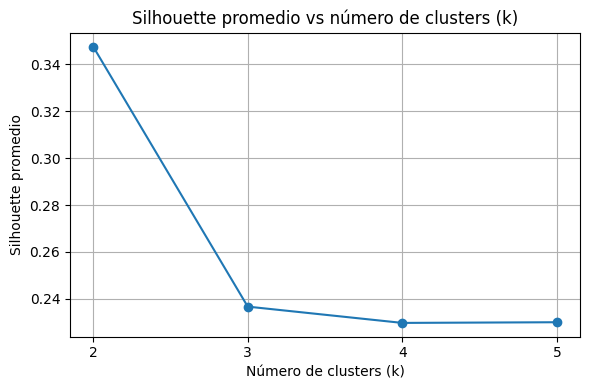

In [781]:
plt.figure(figsize=(6, 4))
plt.plot(list(ks), silhouette_avgs, marker='o')
plt.title('Silhouette promedio vs número de clusters (k)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette promedio')
plt.xticks(list(ks))
plt.grid(True)
plt.tight_layout()
plt.show()

**Prueba del Codo**

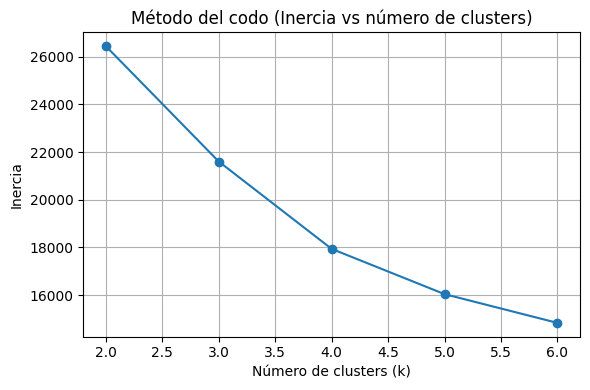

In [783]:
clusters_range = range(2, 7)
inertias = []

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, n_init=20, random_state=12).fit(cluster1_data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Método del codo (Inercia vs número de clusters)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Hierarchical Clustering**

### 1. Single Linkage

In [805]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

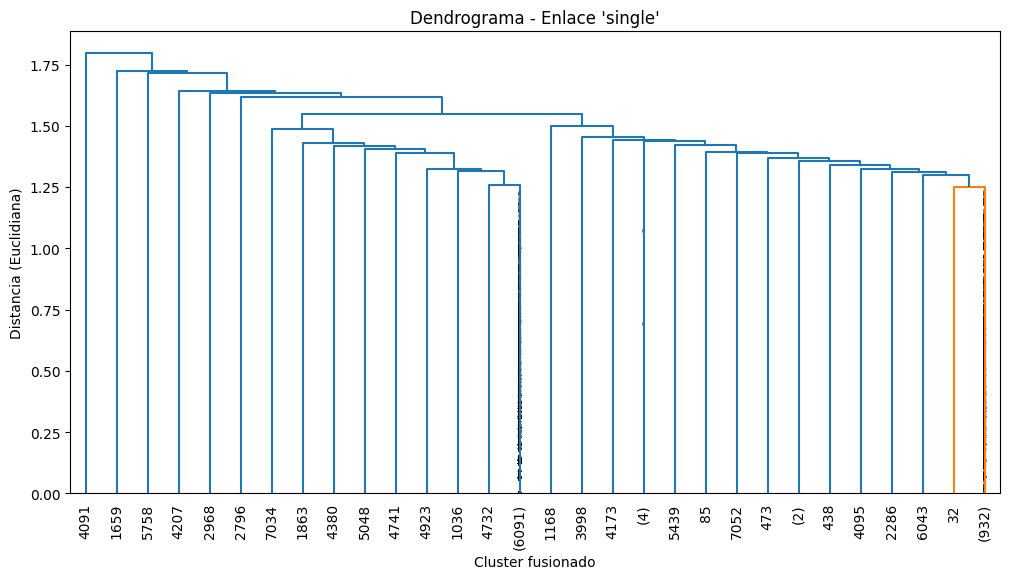

In [792]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z_single = linkage(cluster1_data, method='single', metric='euclidean')

plt.figure(figsize=(12, 6))
dendrogram(Z_single, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrograma - Enlace 'single'")
plt.xlabel("Cluster fusionado")
plt.ylabel("Distancia (Euclidiana)")
plt.show()

In [794]:
clusters_single = fcluster(Z_single, t=5, criterion='distance')

n_clusters = len(np.unique(clusters_single))
print("Número de clusters con enlace 'single':", n_clusters)

Número de clusters con enlace 'single': 1


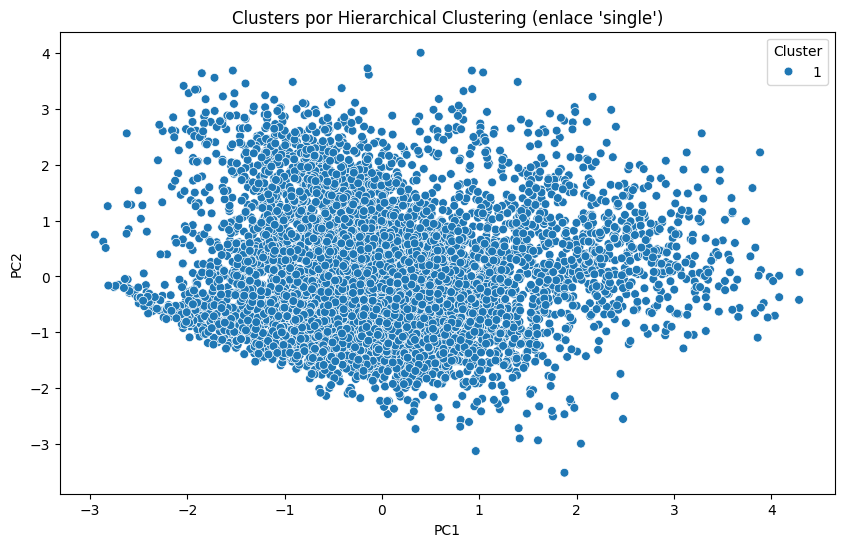

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(cluster1_data)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_single, palette='tab10', s=40)
plt.title("Clusters por Hierarchical Clustering (enlace 'single')")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()


### 2. Complete

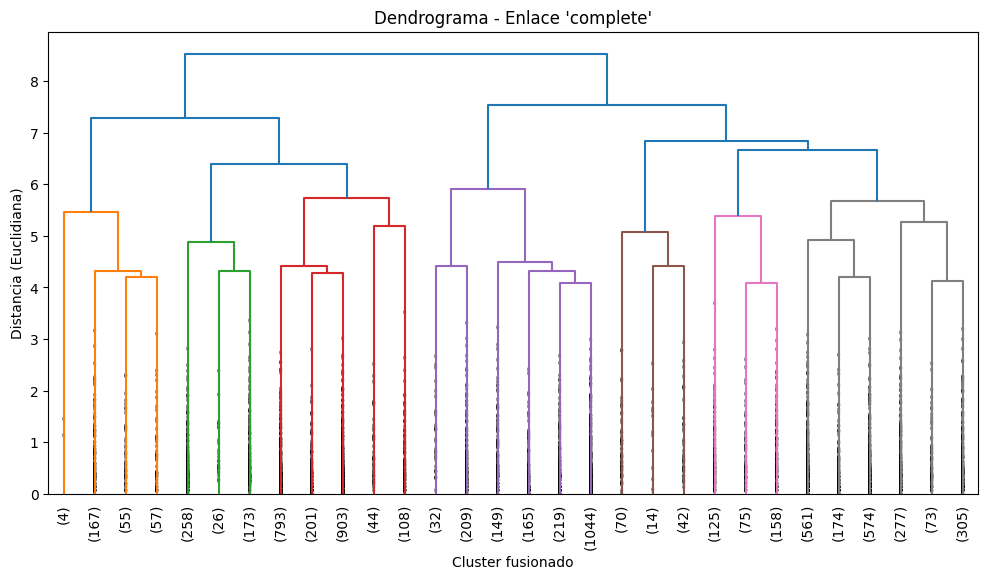

In [801]:
Z_complete = linkage(cluster1_data, method='complete')

plt.figure(figsize=(12, 6))
dendrogram(Z_complete, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrograma - Enlace 'complete'")
plt.xlabel("Cluster fusionado")
plt.ylabel("Distancia (Euclidiana)")
plt.show()

In [803]:
clusters_complete = fcluster(Z_complete, t=5, criterion='distance')

n_clusters = len(np.unique(clusters_complete))
print("Número de clusters con enlace 'complete':", n_clusters)

Número de clusters con enlace 'complete': 15


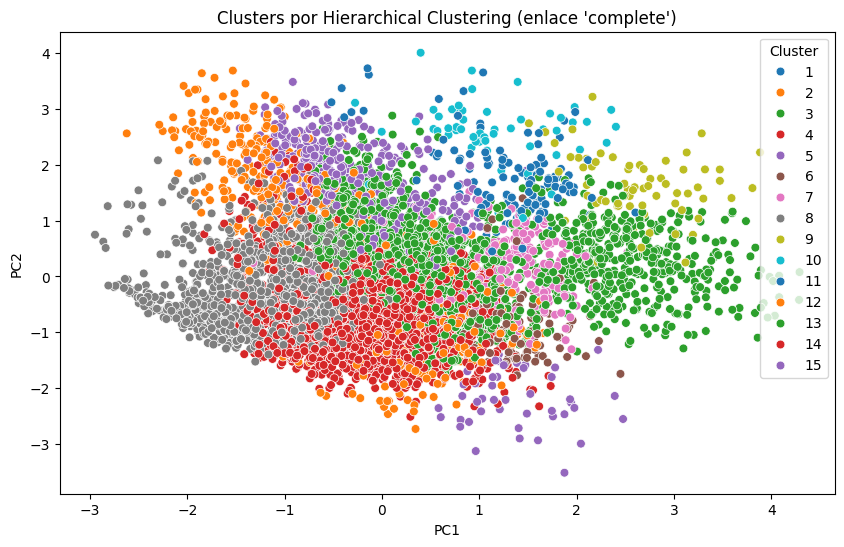

In [804]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(cluster1_data)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_complete, palette='tab10', s=40)
plt.title("Clusters por Hierarchical Clustering (enlace 'complete')")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()

## **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = cluster1_data
eps_values = np.arange(0.3, 2.1, 0.1)
results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=4)
    labels = dbscan.fit_predict(X)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    if n_clusters > 1:
        sil_score = silhouette_score(X, labels)
    else:
        sil_score = np.nan
        
    results.append((eps, n_clusters, n_noise, sil_score))

dbscan_results = pd.DataFrame(results, columns=['eps', 'n_clusters', 'n_noise', 'silhouette'])
display(dbscan_results)

,eps,n_clusters,n_noise,silhouette
0,0.3,207,2829,-0.314965
1,0.4,71,1419,-0.262650
2,0.5,61,937,-0.184671
3,0.6,46,683,-0.148849
4,0.7,31,475,-0.062938
5,0.8,28,331,-0.030216
6,0.9,27,253,-0.019057
7,1.0,11,183,0.051690
8,1.1,4,78,0.251496
9,1.2,4,40,0.297167


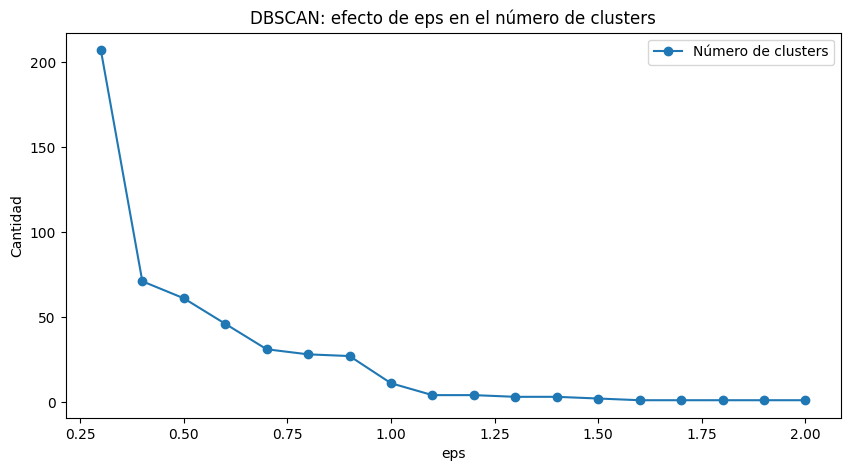

In [759]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(dbscan_results['eps'], dbscan_results['n_clusters'], marker='o', color='tab:blue', label='Número de clusters')
ax.set_xlabel('eps')
ax.set_ylabel('Cantidad')
ax.set_title('DBSCAN: efecto de eps en el número de clusters')
ax.legend()
plt.show()

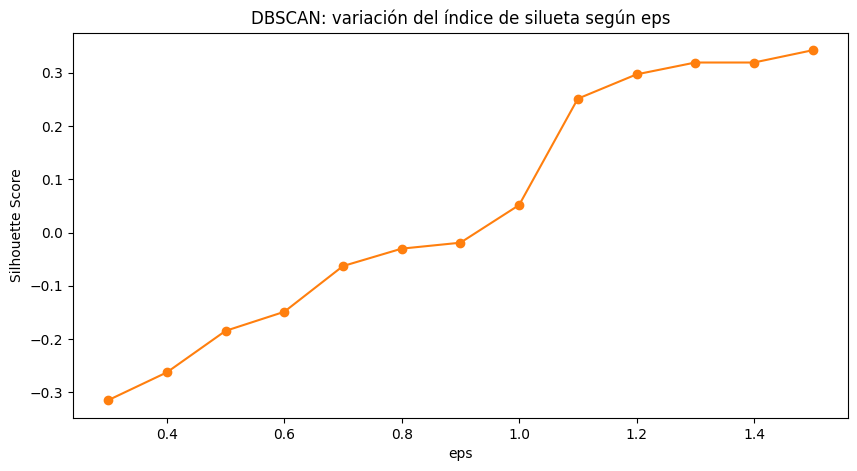

In [760]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(dbscan_results['eps'], dbscan_results['silhouette'], color='tab:orange', marker='o')
ax.set_xlabel('eps')
ax.set_ylabel('Silhouette Score')
ax.set_title('DBSCAN: variación del índice de silueta según eps')
plt.show()

Observamos que al momento de aumentar el valor de la variable `eps`, el número de clusters disminuye. En el rango de 1.1 - 1.4 el número de clusters es reducido a 3 o 4.

Mientras que el coeficiente de Silhouette mejora progresivamente, el valor máximo que alcanza es de 0.34.

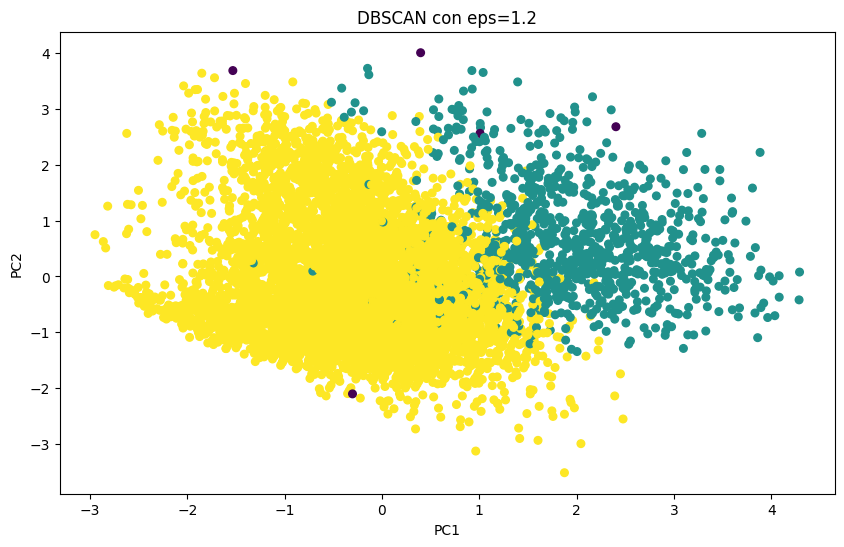

In [761]:
dbscan_final = DBSCAN(eps=1.5, min_samples=4)
labels_final = dbscan_final.fit_predict(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_final, cmap='viridis', s=30)
plt.title("DBSCAN con eps=1.2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## **Gaussian Mixture Models**

In [784]:
from sklearn.mixture import GaussianMixture

X = cluster1_data
cov_types = ['full', 'tied', 'diag', 'spherical']
n_components = np.arange(1, 11)
colors = ['tab:purple', 'tab:red', 'tab:green', 'tab:brown']
results = []

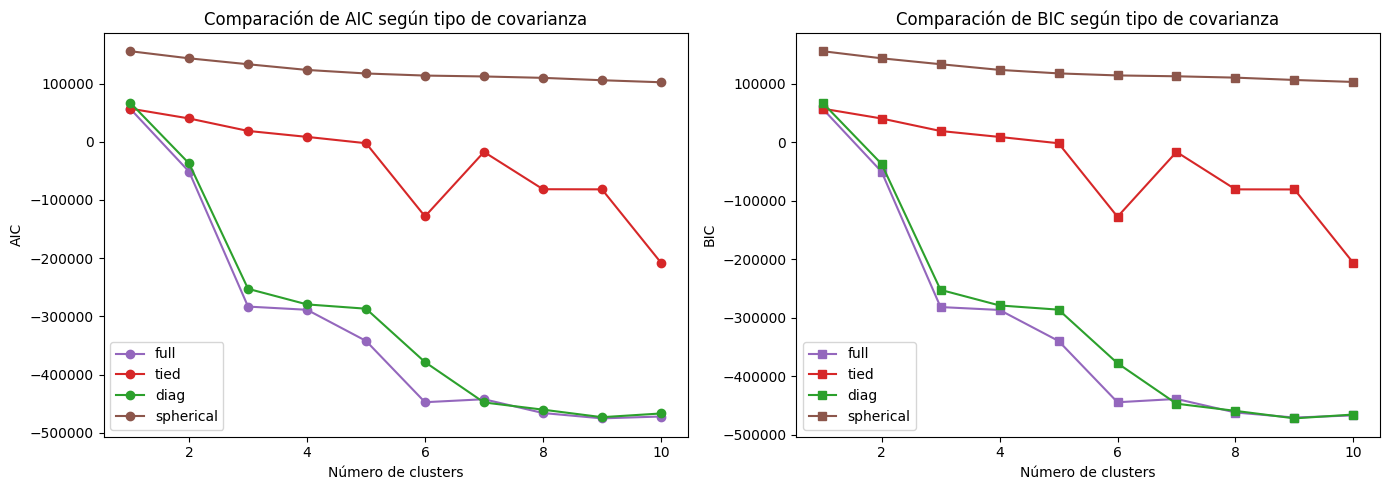

In [785]:
for cov in cov_types:
    aic = []
    bic = []
    for k in n_components:
        gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=42)
        gmm.fit(X)
        aic.append(gmm.aic(X))
        bic.append(gmm.bic(X))
    results.append({'cov_type': cov, 'AIC': aic, 'BIC': bic})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for cov, color in zip(cov_types, colors):
    res = next(r for r in results if r['cov_type'] == cov)
    axes[0].plot(n_components, res['AIC'], marker='o', color=color, label=cov)
    
axes[0].set_title('Comparación de AIC según tipo de covarianza')
axes[0].set_xlabel('Número de clusters')
axes[0].set_ylabel('AIC')
axes[0].legend()

for cov, color in zip(cov_types, colors):
    res = next(r for r in results if r['cov_type'] == cov)
    axes[1].plot(n_components, res['BIC'], marker='s', color=color, label=cov)
    
axes[1].set_title('Comparación de BIC según tipo de covarianza')
axes[1].set_xlabel('Número de clusters')
axes[1].set_ylabel('BIC')
axes[1].legend()

plt.tight_layout()
plt.show()

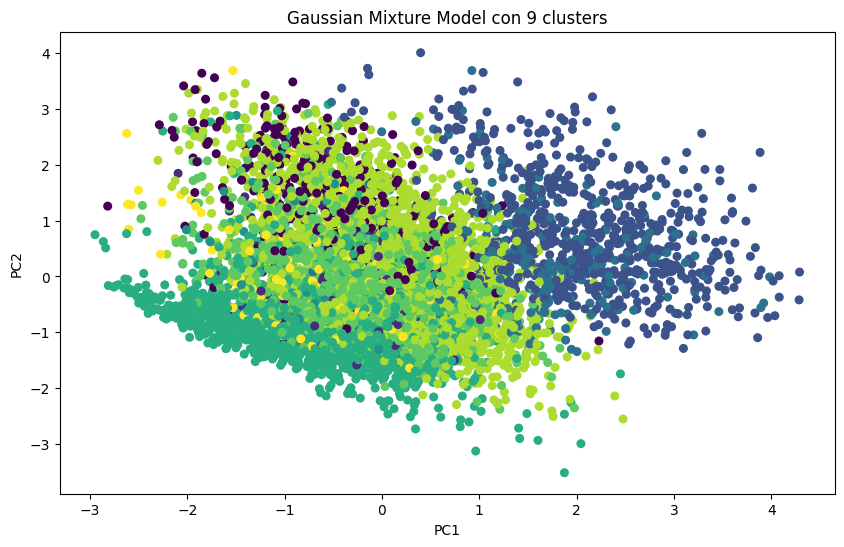

In [788]:
k_gmm = 9
gmm = GaussianMixture(n_components=k_gmm, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_gmm, cmap='viridis', s=30)
plt.title(f'Gaussian Mixture Model con {k_gmm} clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


Aunque el modelo **GMM** con 9 componentes fue el que presentó el mejor ajuste según los criterios **AIC** y **BIC**, la visualización bidimensional mediante PCA no muestra fronteras claramente definidas entre los grupos.

Esto se debe a que el modelo se ajusta en un espacio de alta dimensión, donde los clusters pueden solaparse parcialmente y diferenciarse por combinaciones de variables que no se reflejan en las dos primeras componentes principales.